## Import some helpful libraries

In [1]:
print("    Version control\n------------------------")
import os     # operating system interfaces
import fnmatch
import random
import datetime
import numpy as np;              print("Numpy\t\t", np.__version__)
import matplotlib as mpl;        print("matplotlib\t", mpl.__version__)
import matplotlib.pyplot as plt
import nibabel as nib;           print("NiBabel\t\t {}".format(nib.__version__))
from nibabel.testing import data_path
import math
import pandas as pd;             print("Pandas\t\t {}".format(pd.__version__))
import sys
import imageio;                  print("imageio\t\t {}".format(imageio.__version__))
import h5py;                     print("H5py\t\t {}".format(h5py.__version__))
import sklearn;                  print("Scikit-learn\t {}".format(sklearn.__version__))
import skimage;                  print("Scikit-image\t {}".format(skimage.__version__))
import tensorflow as tf;         print("TensorFlow\t {}".format(tf.__version__))
import keras;                    print("Keras\t\t {}".format(keras.__version__))
from tensorflow.keras import models, Input, Model
from tensorflow.keras.layers import Dense, Conv3D, Conv3DTranspose, MaxPooling3D, UpSampling3D
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import TensorBoard

    Version control
------------------------
Numpy		 1.19.4
matplotlib	 3.3.3
NiBabel		 3.2.0
Pandas		 1.1.4
imageio		 2.9.0
H5py		 2.10.0
Scikit-learn	 0.23.2
Scikit-image	 0.17.2
TensorFlow	 2.3.1
Keras		 2.3.1


Using TensorFlow backend.


## Loading Dataset: Training and Validation Datasets (randomly)

In [2]:
## Loading dataset from path directory

print(os.getcwd())     # '/Users/shossein/GitHub/DTI_Clustering'
dirpath = os.chdir("/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI")
print("\nDirectory is changed into:\n", os.getcwd(), "\n") 
sample_all = []
for sample in fnmatch.filter(os.listdir(dirpath), 'Pat_*_1-post.nii.gz'):
    sample_all.append(sample)
sample_num = len(sample_all)
print("There are totaly", sample_num, "samples.\n")
sample_all.sort()
# print(*sample_all, sep='\t')

## Deviding all samples into two groups: Training and Validation datasets randomly

sample_val = random.sample(sample_all, 24)
sample_val.sort()
print("\n", len(sample_val), "Validation samples are:\n")
# print(*sample_val, sep='\t')

sample_val_subset = sample_val [0:24]
print("\n", len(sample_val_subset), " subset of Validation samples are:\n")
print(*sample_val_subset, sep='\t')

sample_train = [x for x in sample_all if x not in sample_val]
sample_train.sort()
print("\n--------------------------------------------------------------------------------\n\n", len(sample_train), "Training samples are:\n")
# print(*sample_train, sep='\t')

sample_train_subset = sample_train [0:100]
print("\n", len(sample_train_subset), " subset of Validation samples are:\n")
print(*sample_train_subset, sep='\t')

/Users/shossein/GitHub/DTI_Clustering

Directory is changed into:
 /Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI 

There are totaly 124 samples.


 24 Validation samples are:


 24  subset of Validation samples are:

Pat_10_1-post.nii.gz	Pat_113_1-post.nii.gz	Pat_125_1-post.nii.gz	Pat_128_1-post.nii.gz	Pat_14_1-post.nii.gz	Pat_1_1-post.nii.gz	Pat_20_1-post.nii.gz	Pat_30_1-post.nii.gz	Pat_41_1-post.nii.gz	Pat_43_1-post.nii.gz	Pat_45_1-post.nii.gz	Pat_4_1-post.nii.gz	Pat_50_1-post.nii.gz	Pat_52_1-post.nii.gz	Pat_56_1-post.nii.gz	Pat_63_1-post.nii.gz	Pat_67_1-post.nii.gz	Pat_69_1-post.nii.gz	Pat_73_1-post.nii.gz	Pat_75_1-post.nii.gz	Pat_79_1-post.nii.gz	Pat_86_1-post.nii.gz	Pat_8_1-post.nii.gz	Pat_91_1-post.nii.gz

--------------------------------------------------------------------------------

 100 Training samples are:


 100  subset of Validation samples are:

Pat_100_1-post.nii.gz	Pat_101_1-post.nii.gz	Pat_102_1-post.nii.gz	Pat_103_1-post.nii.g

## Pack Train samples together

In [3]:
## Combine all Training dateset together

train_data = np.zeros((1, 182, 218, 182, 1))

sample_train = sample_train_subset            

for sample in sample_train_subset:
#     print(sample)
    img = nib.load(sample)
    img_np = np.asanyarray(img.dataobj)         # Convert data into Numpy array format
    data_64 = np.float64(img_np)                # Convert numpayed data back into the original float64
    data_reshape = np.reshape(data_64, (1, 182, 218, 182, 1))
    train_data = np.concatenate((train_data, data_reshape), axis=0)
train_data = np.delete(train_data, 0, axis=0)
print("Shape of training dataset:", train_data.shape)

Shape of training dataset: (100, 182, 218, 182, 1)


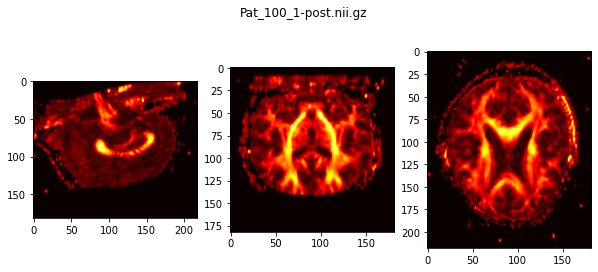

In [4]:
## Showing one or all Training samples in three dimension (one middle slice per each dimension)

def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices), figsize=(10,5))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="hot", origin="upper") # hot, Greys, gray
        
# for m in range(train_data.shape[0]):
for m in range(1):
    slice_0 = train_data[m, 91, :, :, 0]
    slice_1 = train_data[m, :, 109, :, 0]
    slice_2 = train_data[m, :, :, 91, 0]
    show_slices([slice_0, slice_1, slice_2])
    plt.suptitle(sample_train_subset[m], x=0.5, y=0.9)

In [5]:
## Rescale Training dataset into [0:1]

sample_spec = 2      # A specific sample to show the min and max of that 
print("Range of a sample of original training data:\tMin=", np.min(train_data[sample_spec, :, :, :, 0]), ",   Max=", np.max(train_data[sample_spec, :, :, :, 0]), "\n")
for m in range(train_data.shape[0]):
    for x in range(train_data.shape[1]):
        for y in range(train_data.shape[2]):
            for z in range(train_data.shape[3]):
                if train_data[m,x,y,z] <= 0: train_data[m,x,y,z] = 0
                if train_data[m,x,y,z] > 1: train_data[m,x,y,z] = 1
print("Range of a sample of original data:\t\tMin=", np.min(train_data[sample_spec, :, :, :, 0]), ",   Max=", np.max(train_data[sample_spec, :, :, :, 0]), "\n")

Range of a sample of original training data:	Min= -0.0010085757821798325 ,   Max= 0.9992789626121521 

Range of a sample of original data:		Min= 0.0 ,   Max= 0.9992789626121521 



In [38]:
print(os.getcwd())     # "/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI"
dirpath = os.chdir("/Users/shossein/GitHub/DTI_Clustering")
print("\nDirectory is changed into:\n", os.getcwd(), "\n") 

/Users/shossein/GitHub/DTI_Clustering

Directory is changed into:
 /Users/shossein/GitHub/DTI_Clustering 



In [60]:
## Save data
open('train_100.npy', 'wb')
np.save('train_100.npy', train_data)

## Save train sample names
open('train_100_sample_name.csv', 'w')
np.savetxt("train_100_sample_name.csv", sample_train_subset, fmt="%s", delimiter=",")

In [56]:
## load data
sample_train_subset = np.loadtxt("train_100_sample_name.csv", dtype=str, delimiter=",")
train_data = np.load('train_100.npy').reshape(100,182,218,182,1)
train_data.shape

'Pat_102_1-post.nii.gz'

## Pack Valid samples together

In [9]:
## Combine all Validation dateset together

print(os.getcwd())     # '/Users/shossein/GitHub/DTI_Clustering'
dirpath = os.chdir("/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI")
print("\nDirectory is changed into:\n", os.getcwd(), "\n") 
valid_data = np.zeros((1, 182, 218, 182, 1))

sample_val = sample_val_subset            # To test in CPU based computer

for sample in sample_val_subset:
#     print(sample)
    img = nib.load(sample)
    img_np = np.asanyarray(img.dataobj)         # Convert data into Numpy array format
    data_64 = np.float64(img_np)                # Convert numpayed data back into the original float64
    data_reshape = np.reshape(data_64, (1, 182, 218, 182, 1))
    valid_data = np.concatenate((valid_data, data_reshape), axis=0)
valid_data = np.delete(valid_data, 0, axis=0)
print("Shape of validation dataset:", valid_data.shape)

/Users/shossein/GitHub/DTI_Clustering

Directory is changed into:
 /Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI 

Shape of validation dataset: (24, 182, 218, 182, 1)


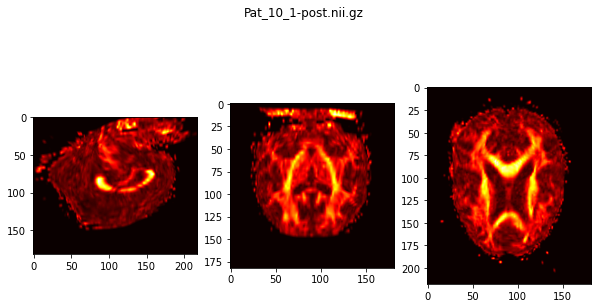

In [10]:
## Showing one or all Validation samples in three dimension (one middle slice per each dimension)

# for m in range(valid_data.shape[0]):
for m in range(1):
    slice_0 = valid_data[m, 91, :, :, 0]
    slice_1 = valid_data[m, :, 109, :, 0]
    slice_2 = valid_data[m, :, :, 91, 0]
    show_slices([slice_0, slice_1, slice_2])
    plt.suptitle(sample_val_subset[m], x=0.5, y=1)

In [11]:
## Rescale Validation dataset into [0:1]

sample_spec = 2      # A specific sample to show the min and max of that 

print("Range of a sample of original validation data:\tMin=", np.min(valid_data[sample_spec, :, :, :, 0]), ",   Max=", np.max(valid_data[sample_spec, :, :, :, 0]), "\n")
for m in range(valid_data.shape[0]):
    for x in range(valid_data.shape[1]):
        for y in range(valid_data.shape[2]):
            for z in range(valid_data.shape[3]):
                if valid_data[m,x,y,z] <= 0: valid_data[m,x,y,z] = 0
                if valid_data[m,x,y,z] > 1: valid_data[m,x,y,z] = 1
print("Range of a sample of original data:\t\tMin=", np.min(valid_data[sample_spec, :, :, :, 0]), ",   Max=", np.max(valid_data[sample_spec, :, :, :, 0]), "\n")

Range of a sample of original validation data:	Min= 0.0 ,   Max= 0.9843322038650513 

Range of a sample of original data:		Min= 0.0 ,   Max= 0.9843322038650513 



In [12]:
print(os.getcwd())     # "/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI"
dirpath = os.chdir("/Users/shossein/GitHub/DTI_Clustering")
print("\nDirectory is changed into:\n", os.getcwd(), "\n") 

/Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/DTI

Directory is changed into:
 /Users/shossein/GitHub/DTI_Clustering 



In [43]:
## Save data
open('valid_24.npy', 'wb')
np.save('valid_24.npy', valid_data)

## Save validation sample names
open("valid_24_sample_name.csv", "w")
np.savetxt("valid_24_sample_name.csv", sample_val_subset, fmt="%s", delimiter=",")

In [14]:
## load data
sample_val_subset = np.loadtxt("valid_24_sample_name.csv", dtype=str, delimiter=",")
valid_data = np.load('valid24.npy').reshape(24,182,218,182,1)
valid_data.shape

(24, 182, 218, 182, 1)

## Model Design

In [20]:
## Define parameters:

IMAGE_HEIGHT = train_data.shape[1]
IMAGE_WIDTH = train_data.shape[2]
IMAGE_DEPTH = train_data.shape[3]
batch_size = 1
data_shape = [1, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH, 1]
input_shape = [batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH, 1]
print("input-layer shape:", input_shape)

## Encoder
input_img = Input(shape=(182, 218, 182, 1))
x = Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='relu', name='Conv1')(input_img)
x = MaxPooling3D(pool_size=(13, 13, 13), padding='same')(x)
x = Conv3D(filters=8, kernel_size=(3, 3, 3), padding='same', activation='relu', name='Conv2')(x)
encoded = MaxPooling3D(pool_size=(7, 7, 7), padding='same')(x)
## at this point the representation is (2, 3, 2, 8) i.e. 96-dimensional instead of 7,221,032

## Decoder
x = Conv3DTranspose(filters=4, kernel_size=(3, 3, 3), padding='same', activation='relu', name='DeConv3')(encoded)
x = UpSampling3D(size=(7, 6, 7))(x)
x = Conv3DTranspose(filters=8, kernel_size=(3, 3, 3), padding='same', activation='relu', name='DeConv4')(x)
x = UpSampling3D(size=(13, 12, 13))(x)
decoded = Conv3DTranspose(filters=1, kernel_size=(1, 3, 1), padding='valid', activation='sigmoid', name='DeConv5')(x)

autoencoder = Model(inputs=input_img, outputs=decoded)
# autoencoder.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

input-layer shape: [1, 182, 218, 182, 1]
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 182, 218, 182, 1) 0         
_________________________________________________________________
Conv1 (Conv3D)               (None, 182, 218, 182, 16) 448       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 14, 17, 14, 16)    0         
_________________________________________________________________
Conv2 (Conv3D)               (None, 14, 17, 14, 8)     3464      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 2, 3, 2, 8)        0         
_________________________________________________________________
DeConv3 (Conv3DTranspose)    (None, 2, 3, 2, 4)        868       
_________________________________________________________________
up_sampling3d

## Model Training

In [21]:
## Tensorboard

# %load_ext tensorboard
%reload_ext tensorboard
logdir = os.path.join("CAE_logs", datetime.datetime.now().strftime("%Y_%m_%d____%H_%M_%S"))
tb_callback = TensorBoard(logdir, histogram_freq=1)

In [22]:
## Midel Fit
autoencoder.fit(train_data, train_data, epochs=3, batch_size=batch_size, shuffle=True, steps_per_epoch=5, validation_data=(valid_data, valid_data), callbacks=[tb_callback], verbose=1)
autoencoder.save_weights("CAE_weights.hdf5")
# autoencoder.load_weights("CAE_weights.hdf5")     # loading weights

Epoch 1/3
5/5 [==============================] - 93s 19s/step - loss: 0.6344 - accuracy: 0.6766 - val_loss: 0.5533 - val_accuracy: 0.4403
Epoch 2/3
5/5 [==============================] - 97s 19s/step - loss: 0.4569 - accuracy: 0.6961 - val_loss: 0.3340 - val_accuracy: 0.4417
Epoch 3/3
5/5 [==============================] - 98s 20s/step - loss: 0.3141 - accuracy: 0.7094 - val_loss: 0.3437 - val_accuracy: 0.4417


In [23]:
tensorboard --logdir=CAE_logs